# Import Package

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

SEED = 2021
#pd.options.display.max_rows = 1000

In [10]:
import scipy
import sklearn
print(pd.__version__)
print(np.__version__)
print(scipy.__version__)
print(sklearn.__version__)
print(sns.__version__)

1.3.3
1.21.2
1.7.1
0.24.2
0.11.2


# Import Data

## Load CSV

In [305]:
data = pd.read_csv('data/credit_risk_dataset.csv')
print('Data loaded on', datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))
print("Number of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))
data.head()

Data loaded on 2021-09-18 16:06:10
Number of rows: 32581
Number of columns: 12


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [306]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 32581
Number of columns: 12


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Check Duplicate

In [308]:
data[data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
16038,26,20000,MORTGAGE,5.0,MEDICAL,A,4800,5.99,0,0.24,N,3
16065,22,130000,MORTGAGE,3.0,VENTURE,B,24250,12.18,0,0.19,N,4
16070,21,27600,RENT,4.0,EDUCATION,A,7500,6.76,0,0.27,N,4
16079,23,26000,RENT,1.0,EDUCATION,B,4000,NaN,0,0.15,N,4
16091,23,50000,MORTGAGE,3.0,EDUCATION,A,10000,6.03,0,0.20,N,4


In [309]:
# Duplicated data
data.loc[data.duplicated(keep=False), :].sort_values(by=['person_age', 'person_income'])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
17601,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
1778,21,20000,RENT,0.0,MEDICAL,A,2000,NaN,0,0.10,N,3
17642,21,20000,RENT,0.0,MEDICAL,A,2000,NaN,0,0.10,N,3
740,21,21600,OWN,NaN,VENTURE,A,7125,6.99,0,0.33,N,3
17283,21,21600,OWN,NaN,VENTURE,A,7125,6.99,0,0.33,N,3


Observation: Terdapat 165 data duplicated

### Handling Duplicated Data

In [310]:
data.drop_duplicates(keep='first', inplace=True)

In [311]:
print('Number of rows after drop duplicated data:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows after drop duplicated data: 32416
Number of columns: 12


Sebelum drop duplicate: 32581 data
Setelah drop duplicate: 32416 data

## Data Exploration

### Column Types

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


### Descriptive Statistics

#### Continuous Variable

In [313]:
pd.options.display.max_rows = 1000
data.describe(include='number').applymap('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.00,27.75,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32416.00,66091.64,62015.58,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.00,4.79,4.15,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.00,9593.85,6322.73,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.00,11.02,3.24,5.42,7.90,10.99,13.47,23.22
loan_status,32416.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.00,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.00,5.81,4.06,2.00,3.00,4.00,8.00,30.00


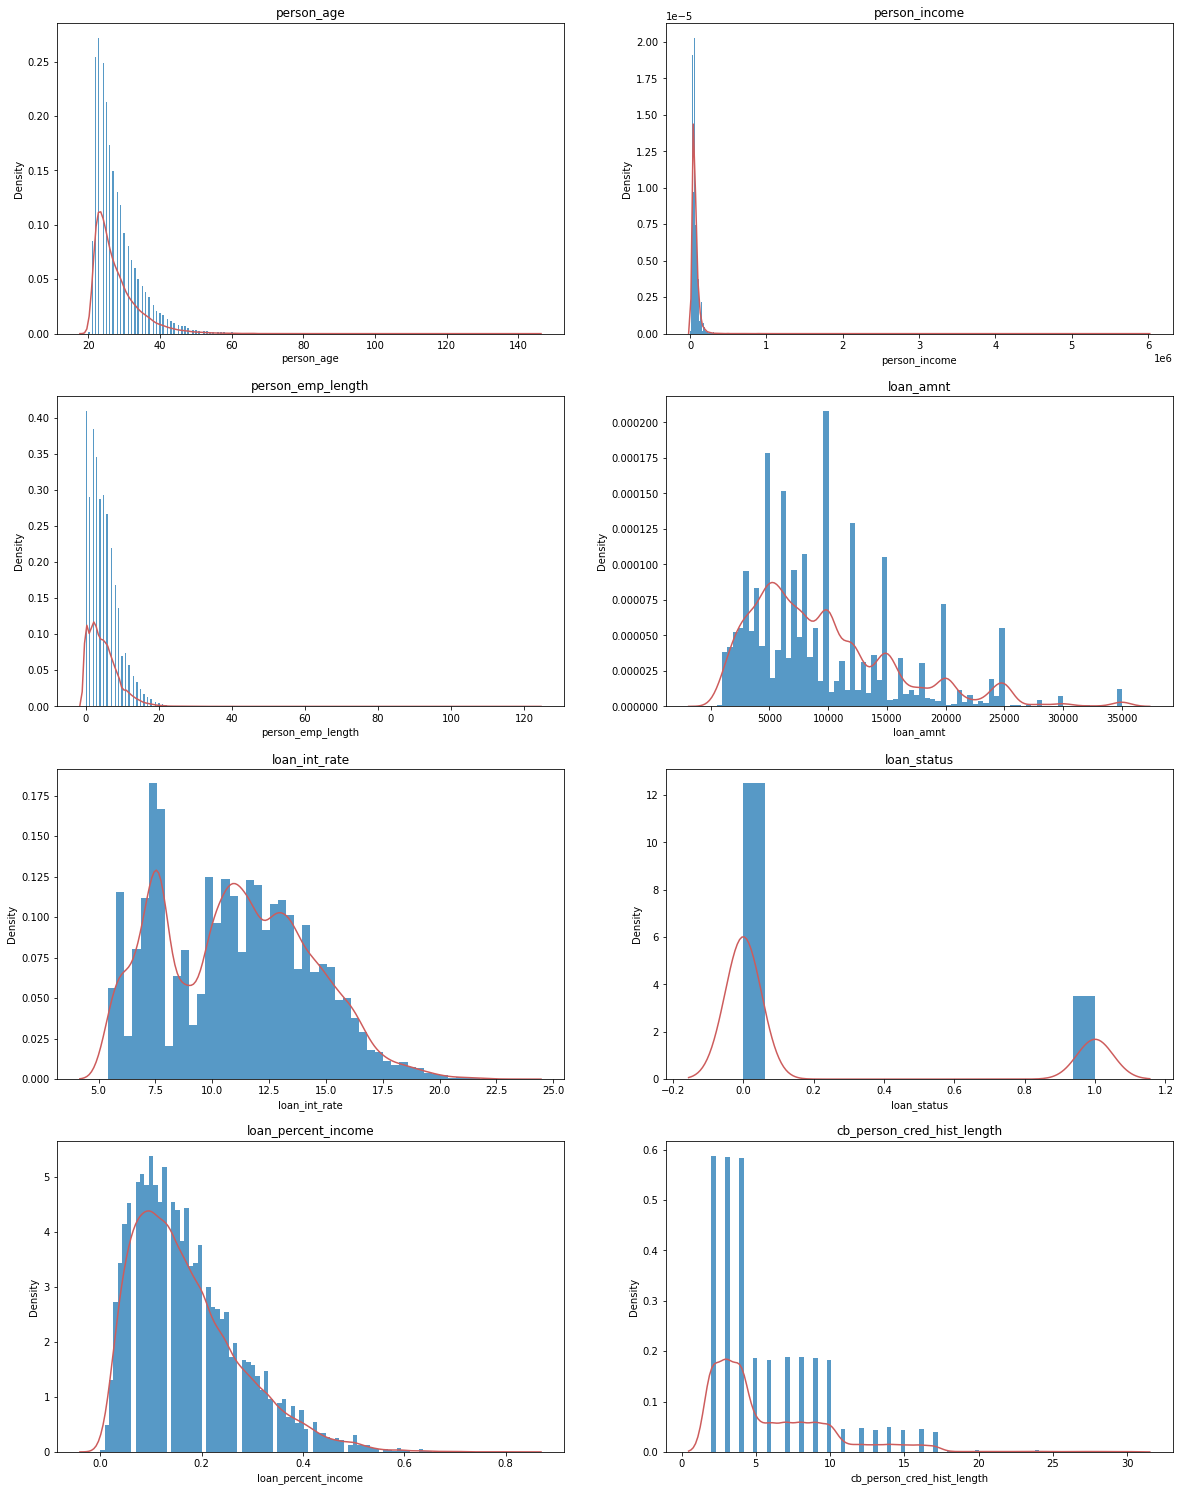

In [314]:
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()
plt.figure(figsize=(20,40))
for i,col in enumerate(num_cols, start=1):
    plt.subplot(6,2,i)
    sns.histplot(data[col], stat="density", linewidth=0)
    sns.kdeplot(data[col], color='indianred')
    plt.title(col)

plt.show()

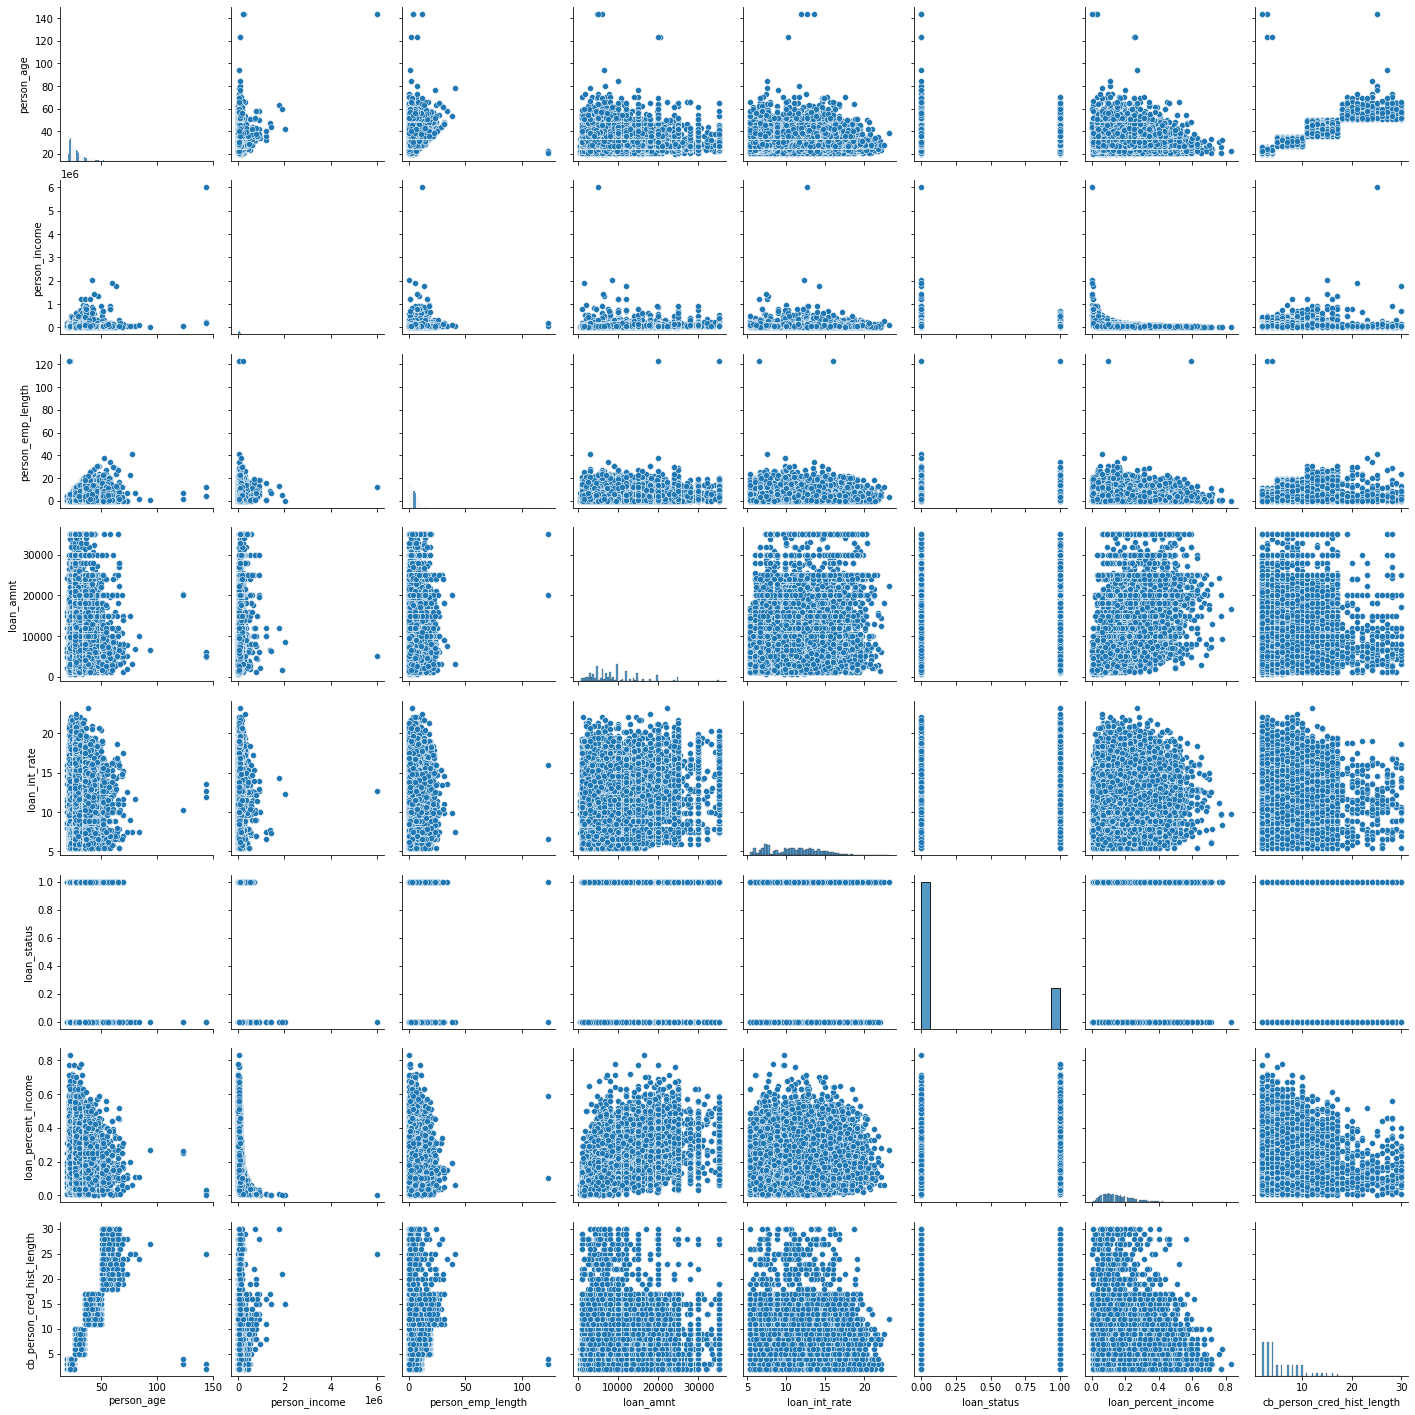

In [315]:
# Pairplot Visualization
sns.pairplot(data[num_cols])
plt.show()

#### Categorical Variable

In [316]:
data.describe(include='object').T

,count,unique,top,freq
person_home_ownership,32416,4,RENT,16378
loan_intent,32416,6,EDUCATION,6411
loan_grade,32416,7,A,10703
cb_person_default_on_file,32416,2,N,26686


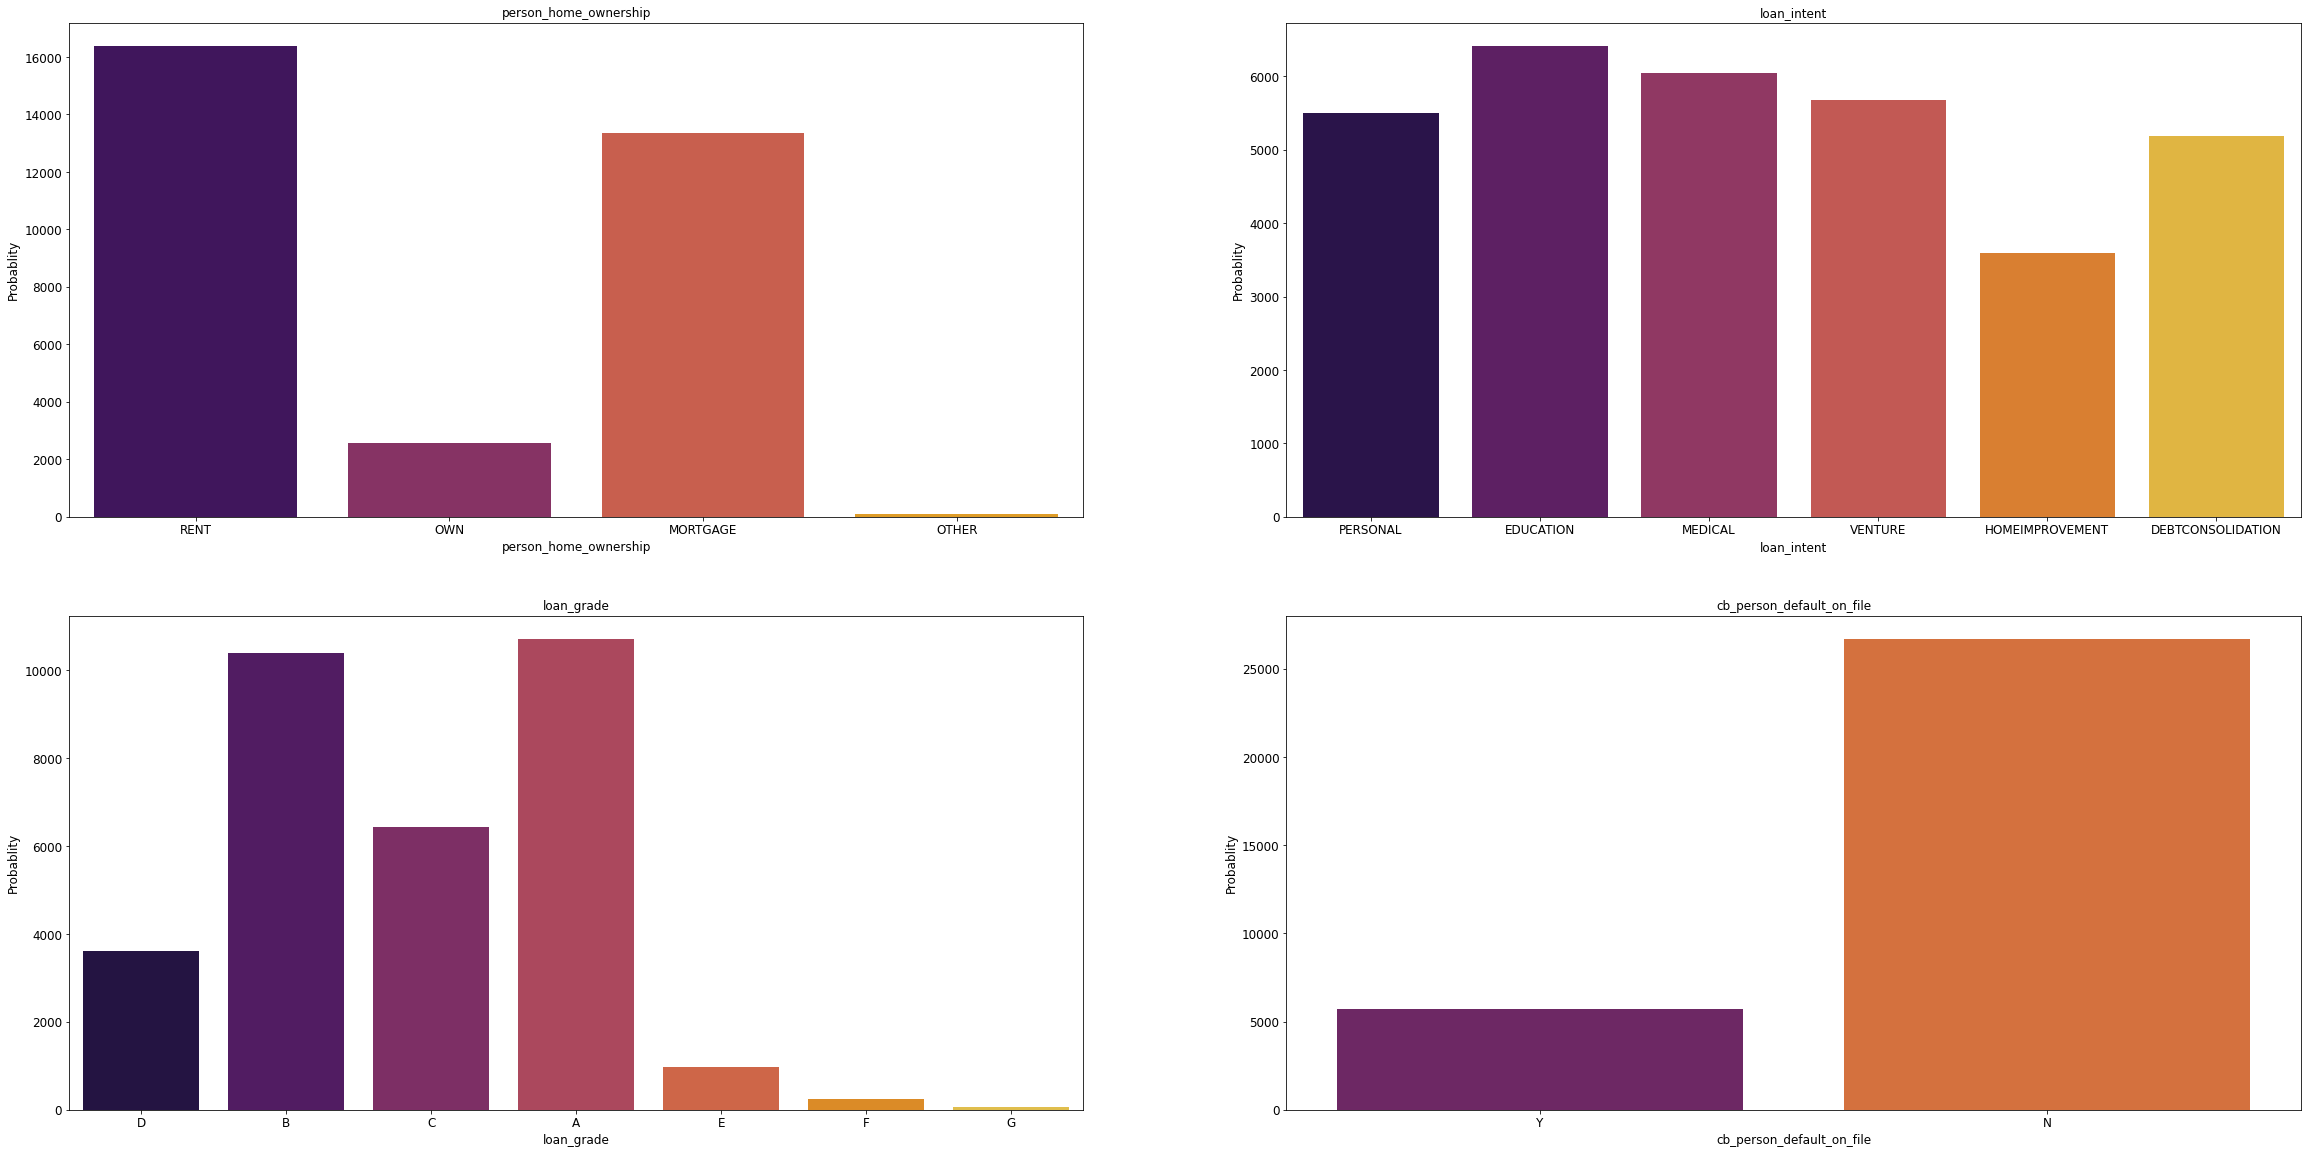

In [317]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize=(40,20))
for i,col in enumerate(cat_cols, start=1):
    plt.subplot(2,2,i)
    sns.countplot(x=col, data=data, palette='inferno')
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col)

plt.show()

# Feature Transformation

## Metadata Definition

In [318]:
target = 'loan_status'
continuous_features = data.select_dtypes(exclude=['object']).columns.tolist()
continuous_features.remove(target) # Remove target
nominal_features = data.select_dtypes(include=['object']).columns.tolist()

print('Continuous Features:',continuous_features)
print('Nominal Features:',nominal_features)

Continuous Features: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Nominal Features: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [319]:
data[continuous_features].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4


In [320]:
data[nominal_features].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


## Handling Nan Column

### Check Column with NaN

In [321]:
# List Columns with NaN
print('Total columns:',data.shape[1])
print('There are: {} missing columns:',len(data.columns[data.isna().any()]))

Total columns: 12
There are: {} missing columns: 2


In [322]:
# Nan Counts by Column
data[data.columns[data.isnull().any()]].isnull().sum()

person_emp_length     887
loan_int_rate        3095
dtype: int64

In [323]:
# Nan Percentage by Column
round(data[data.columns[data.isnull().any()]].isnull().sum()/data.shape[0]*100,2)

person_emp_length    2.74
loan_int_rate        9.55
dtype: float64

**Obeservation**:

Only two columns of data contains NaN,
`person_emp_length` contains **2.74%** NaN and `loan_int_rate` contains **9.55%** NaN. We can fill the missing values without dropping the features.

### Filling NaN

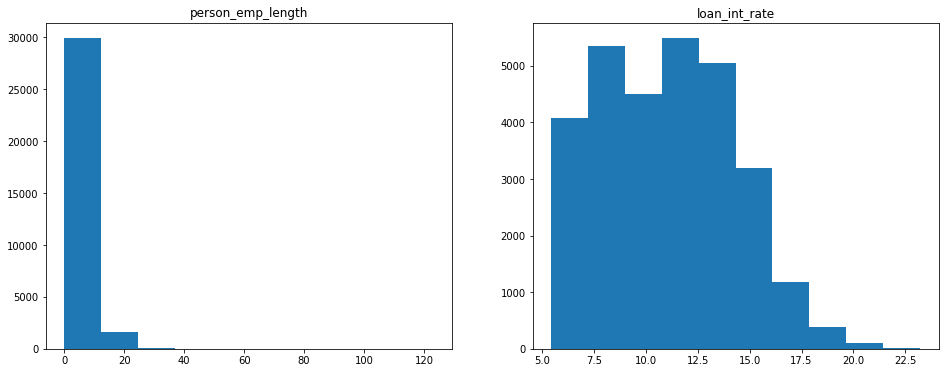

In [324]:
nan_cols = ['person_emp_length', 'loan_int_rate']

plt.figure(figsize=(16,6))
for i,col in enumerate(nan_cols, start=1):
    plt.subplot(1,2,i)
    plt.hist(data[col])
    plt.title(col)
plt.show()

Observation: 
Both features are not normally distributed. Therefore we will fill the NaNs with the median values for both the employment length and loan interest rate features.

In [325]:
for i in nan_cols:
    data[f'{i}_nan'] = data[i].fillna(data[i].median())

In [326]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length_nan,loan_int_rate_nan
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,123.0,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,5.0,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.0,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,4.0,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,8.0,14.27


We can also using WOE for handling missing values into NaN bin

## OneHotEncoding

In [327]:
encoder = OneHotEncoder().fit(data[nominal_features])
data_transformed = encoder.transform(data[nominal_features]).toarray()

In [328]:
column_name = encoder.get_feature_names(nominal_features)
#column_name

In [329]:
data_one_hot_encoded =  pd.DataFrame(data_transformed, columns= column_name, index=data[nominal_features].index).astype(int)

In [330]:
#test = pd.concat([data.drop(nominal_features,axis=1),one_hot_encoded_frame], axis=1).reset_index(drop=True)
data = pd.concat([data,data_one_hot_encoded], axis=1).reset_index(drop=True)

In [331]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,...,0,0,0,1,0,0,0,0,1,0
32412,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,...,0,1,0,0,0,0,0,0,1,0
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,...,0,0,1,0,0,0,0,0,1,0
32414,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,...,0,0,1,0,0,0,0,0,1,0


In [332]:
# Save encoder as pkl
ONEHOTENCODER = 'model/OHE-1.0.0.pkl'
COLUMN_NAME = 'model/COLNAME-1.0.0.pkl'

with open(ONEHOTENCODER, 'wb') as f: # save encoder
    pickle.dump(encoder, f)
    
with open(COLUMN_NAME, 'wb') as f: # save encoder column name
    pickle.dump(nominal_features, f)

In [333]:
# TestScenario
a#loaded_encoder

loaded_colname = pickle.load(open(COLUMN_NAME, 'rb'))
#loaded_colname

In [334]:
sample = data[nominal_features].sample(n=2, random_state=1)
data_transformed = loaded_encoder.transform(sample).toarray()
column_name = loaded_encoder.get_feature_names(loaded_colname)
pd.DataFrame(data_transformed, columns=column_name, index=sample.index).astype(int)

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
6475,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
30085,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


## Handling Outliers

In [335]:
data[continuous_features].describe().applymap('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.00,27.75,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32416.00,66091.64,62015.58,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.00,4.79,4.15,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.00,9593.85,6322.73,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.00,11.02,3.24,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32416.00,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.00,5.81,4.06,2.00,3.00,4.00,8.00,30.00


In [422]:
##

data['loan_grade'].value_counts()



A    10701
B    10384
C     6434
D     3619
E      963
F      241
G       64
Name: loan_grade, dtype: int64

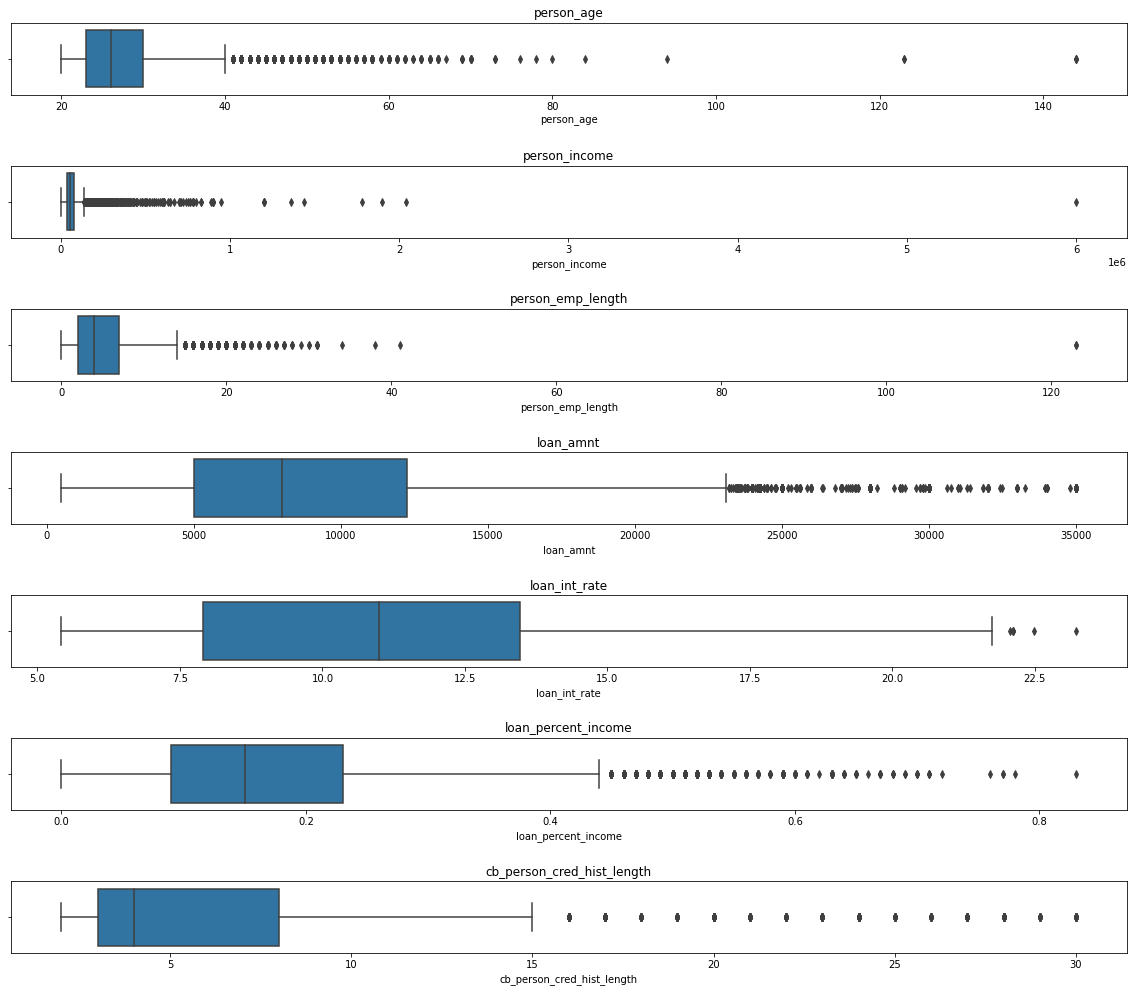

In [336]:
# Check Outliers
cols = continuous_features

plt.figure(figsize=(20,25))
for i,col in enumerate(cols, start=1):
    plt.subplot(10,1,i)
    sns.boxplot(x=data[col], data=data)
    plt.title(col)
    plt.subplots_adjust(hspace=1)
plt.show()

In [337]:
# Person_income ouliers check
data.sort_values(by=['person_age']).tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
32369,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,...,0,1,0,0,0,0,0,0,1,0
32190,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,...,0,1,0,0,0,0,0,0,1,0
32257,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,...,0,0,1,0,0,0,0,0,1,0
32341,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,...,0,1,0,0,0,0,0,0,1,0
32251,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,...,0,0,0,1,0,0,0,0,1,0
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,...,0,0,1,0,0,0,0,0,1,0
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,...,1,0,1,0,0,0,0,0,1,0
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,...,1,0,0,1,0,0,0,0,1,0
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,...,0,0,1,0,0,0,0,0,1,0
32132,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,...,0,0,0,1,0,0,0,0,1,0


In [338]:
# Person_income ouliers check
data.sort_values(by=['person_income']).tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
17712,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,...,0,0,1,0,0,0,0,0,1,0
28960,36,1200000,OWN,16.0,MEDICAL,A,10000,6.54,0,0.01,...,0,1,0,0,0,0,0,0,1,0
28961,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0,0.01,...,0,1,0,0,0,0,0,0,1,0
17711,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,...,1,1,0,0,0,0,0,0,1,0
31763,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,...,1,1,0,0,0,0,0,0,1,0
31765,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,...,0,1,0,0,0,0,0,0,1,0
32332,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,...,0,0,0,1,0,0,0,0,1,0
32381,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,...,0,1,0,0,0,0,0,0,1,0
29890,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,...,1,0,0,1,0,0,0,0,0,1
32132,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,...,0,0,0,1,0,0,0,0,1,0


In [339]:
# Person_emp_length outliers check
data.sort_values(by=['person_emp_length_nan']).tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
32397,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,0.15,...,0,0,1,0,0,0,0,0,1,0
30755,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,...,0,0,0,0,1,0,0,0,1,0
32099,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,...,0,0,1,0,0,0,0,0,1,0
31707,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,...,1,0,1,0,0,0,0,0,1,0
31708,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,...,1,0,1,0,0,0,0,0,1,0
32263,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,...,0,0,0,0,1,0,0,0,0,1
32350,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,...,0,0,1,0,0,0,0,0,1,0
32190,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,...,0,1,0,0,0,0,0,0,1,0
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,...,1,1,0,0,0,0,0,0,1,0
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,0,0,0,1,0,0,0,0,1


**Observation**: All of the distributions are positive skewed.

- `person_age`: Most people are 20 to 30 years old (75%). In the following analysis, to be more general, people with age > 80 will be droped.
- `person_income`: It seems that there are outliers which has to be removed (> 2 million).
- `person_emp_length`: Most people have less than 41 years of employment. People with employment > 41 years will be droped.


For all other variables, the distribution is more uniform across the whole range, thus they will be kept.

In [340]:
print('Number of rows before drop outliers:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows before drop outliers: 32416
Number of columns: 33


In [341]:
#Drop outliers
data = data[data['person_age']<=80]
data = data[data['person_income']<=2e6]
data = data[data['person_emp_length_nan']<=41]

In [342]:
print('Number of rows after drop outliers:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows after drop outliers: 32406
Number of columns: 33


### WOE
[https://www.analyticsvidhya.com/blog/2021/06/understand-weight-of-evidence-and-information-value/](https://www.analyticsvidhya.com/blog/2021/06/understand-weight-of-evidence-and-information-value/)

In [343]:
# WOE Will Handle NaN, we already dropped the outliers earlier
data[continuous_features].isnull().sum()

person_age                       0
person_income                    0
person_emp_length              887
loan_amnt                        0
loan_int_rate                 3093
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

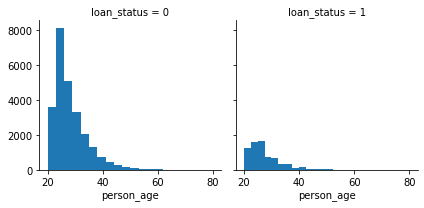

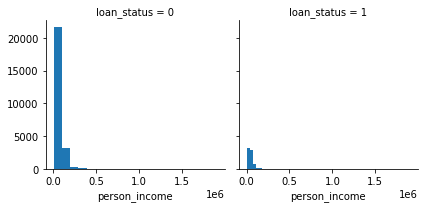

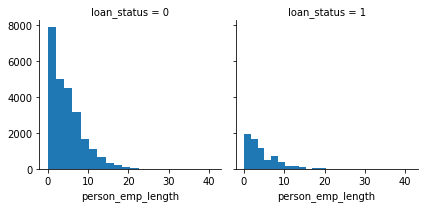

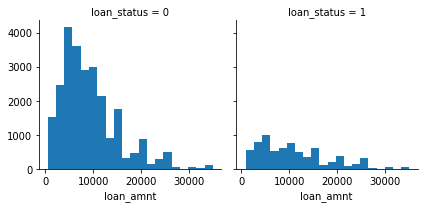

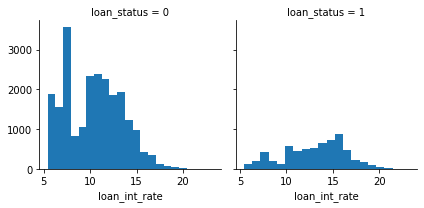

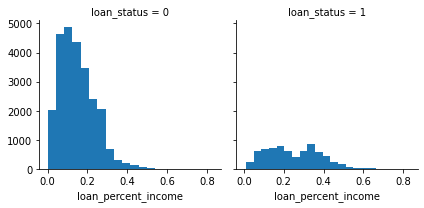

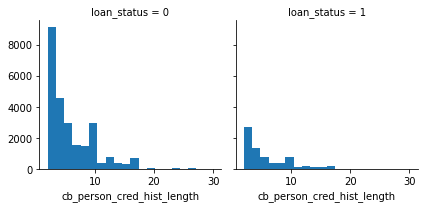

In [344]:
for i in continuous_features:
    g = sns.FacetGrid(data, col=target)
    g.map(plt.hist, i, bins=20)

In [345]:
data[continuous_features].describe().applymap('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
person_age,32406.00,27.73,6.19,20.00,23.00,26.00,30.00,80.00
person_income,32406.00,65833.77,51362.07,4000.00,38500.00,55000.00,79200.00,1900000.00
person_emp_length,31519.00,4.78,4.04,0.00,2.00,4.00,7.00,41.00
loan_amnt,32406.00,9592.60,6321.15,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29313.00,11.02,3.24,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32406.00,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32406.00,5.81,4.05,2.00,3.00,4.00,8.00,30.00


#### person_age WOE

In [346]:
# person_age
feature = 'person_age'
binning=[-float("inf"), 21, float("inf")]

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']* (datax[1]-datax[0])))).applymap('{:.3f}'.format)

data_woe_iv

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 21.0]",0.034,0.052,0.441,0.009
"(21.0, inf]",0.966,0.948,-0.020,0.009


#### person_income WOE

In [347]:
feature = 'person_income'
binning=[-float("inf"), 20000,60000,100000, float("inf")]

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 20000.0]",0.011217,0.123871,2.401785,0.477167
"(20000.0, 60000.0]",0.510822,0.638403,0.222948,0.477167
"(60000.0, 100000.0]",0.328422,0.181292,-0.594190,0.477167
"(100000.0, inf]",0.149538,0.056433,-0.974488,0.477167


#### person_emp_length WOE

In [348]:
# person_emp_length. Contain NaN values
feature = 'person_emp_length'
binning=[-float("inf"), 2, 4, 7, float("inf")]

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']* (datax[1]-datax[0])))).applymap('{:.3f}'.format)

data_woe_iv

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 2.0]",0.311,0.414,0.285,0.067
"(2.0, 4.0]",0.197,0.184,-0.072,0.067
"(4.0, 7.0]",0.249,0.206,-0.192,0.067
"(7.0, inf]",0.218,0.157,-0.329,0.067
Nan,0.024,0.040,0.505,0.067


#### loan_amnt WOE

In [349]:
# loan_amnt
feature = 'loan_amnt'
binning=[-float("inf"), 13000,18000,23000,float("inf")]

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 13000.0]",0.794376,0.680446,-0.154808,0.077633
"(13000.0, 18000.0]",0.117387,0.152652,0.262688,0.077633
"(18000.0, 23000.0]",0.045896,0.081123,0.569584,0.077633
"(23000.0, inf]",0.042341,0.085779,0.706006,0.077633


#### loan_int_rate WOE

In [350]:
feature = 'loan_int_rate'
binning=[-float("inf"), 14,18, float("inf")]

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 14.0]",0.798049,0.500988,-0.465588,0.561423
"(14.0, 18.0]",0.099850,0.367240,1.302349,0.561423
"(18.0, inf]",0.005253,0.041337,2.062936,0.561423
Nan,0.096848,0.090435,-0.068517,0.561423


#### loan_percent_income WOE

In [351]:
feature = 'loan_percent_income'
binning=[-float("inf"), 0.3,0.5,0.75, float("inf")]

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']*
                                           (datax[1]-datax[0]))))

data_woe_iv

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 0.3]",0.955407,0.620626,-0.431408,0.863676
"(0.3, 0.5]",0.042499,0.352144,2.114551,0.863676
"(0.5, 0.75]",0.002054,0.026665,2.563616,0.863676
"(0.75, inf]",0.000039,0.000564,2.659407,0.863676


#### cb_person_cred_hist_length WOE

In [352]:
# cb_person_cred_hist_length
feature = 'cb_person_cred_hist_length'
binning=[-float("inf"), 2, 3, 4, float("inf")]

bin_feature = pd.cut(data[feature], bins=binning).values.add_categories('Nan').fillna('Nan')
data_woe_iv = (pd.crosstab(bin_feature,data[target],normalize='columns')
             .assign(woe=lambda datax: np.log(datax[1] / datax[0]))
             .assign(iv=lambda datax: np.sum(datax['woe']* (datax[1]-datax[0])))).applymap('{:.3f}'.format)

data_woe_iv

loan_status,0,1,woe,iv
row_0,,,,
"(-inf, 2.0]",0.179,0.198,0.104,0.004
"(2.0, 3.0]",0.181,0.186,0.029,0.004
"(3.0, 4.0]",0.180,0.186,0.032,0.004
"(4.0, inf]",0.460,0.430,-0.069,0.004


#### Transform to WOE

In [353]:
# Transform
woe = {
    'person_age': {'binning': [-float("inf"), 21, float("inf")], 'labels': [0.441, -0.021], 'nan': 0},
    'person_income': {'binning': [-float("inf"), 20000,60000,100000, float("inf")], 'labels': [2.402, 0.223, -0.594, -0.974], 'nan': 0}, 
    'person_emp_length': {'binning': [-float("inf"), 2, 4, 7, float("inf")], 'labels': [0.285, -0.072, -0.192, -0.329], 'nan': 0.505}, 
    'loan_amnt': {'binning': [-float("inf"), 13000,18000,23000,float("inf")], 'labels': [-0.155,0.263, 0.570, 0.706], 'nan': 0}, 
    'loan_int_rate': {'binning': [-float("inf"), 14,18, float("inf")], 'labels': [-0.466, 1.302, 2.063], 'nan': -0.069}, 
    'loan_percent_income': {'binning': [-float("inf"), 0.3,0.5,0.75, float("inf")], 'labels': [-0.431, 2.111, 2.572, 2.662], 'nan': -0.069}, 
    'cb_person_cred_hist_length': {'binning': [-float("inf"), 2, 3, 4, float("inf")], 'labels': [0.104, 0.029, 0.032, -0.069], 'nan': 0}, 
    
}

for feature, woe_info in woe.items():
    print('feature:', feature)
    data[f'{feature}_WOE'] = pd.cut(data[feature], bins=woe_info['binning'], labels=woe_info['labels'])
    data[f'{feature}_WOE'] = data[f'{feature}_WOE'].values.add_categories('Nan').fillna('Nan') 
    data[f'{feature}_WOE'] = data[f'{feature}_WOE'].replace('Nan', woe_info['nan'])
    data[f'{feature}_WOE'] = data[f'{feature}_WOE'].astype(float)

feature: person_age
feature: person_income
feature: person_emp_length
feature: loan_amnt
feature: loan_int_rate
feature: loan_percent_income
feature: cb_person_cred_hist_length


In [354]:
# Save WOE Dictionary as pkl
WOE_DICT = 'model/WOE-1.0.0.pkl'

with open(WOE_DICT, 'wb') as f: # save encoder
    pickle.dump(woe, f)
    
# TestScenario
#loaded_woe = pickle.load(open(WOE_DICT, 'rb'))
#loaded_woe

In [355]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age_WOE,person_income_WOE,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE,loan_percent_income_WOE,cb_person_cred_hist_length_WOE
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,1,0,0.441,2.402,-0.192,-0.155,-0.466,-0.431,0.104
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,1,0,-0.021,2.402,0.285,-0.155,-0.466,2.572,0.029
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,1,0,-0.021,-0.594,-0.072,0.706,1.302,2.572,0.104
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,1,-0.021,0.223,-0.329,0.706,1.302,2.572,0.032
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0,1,0,0.441,2.402,0.285,-0.155,-0.466,-0.431,0.104


# Sample Splitting

In [356]:
#X = data[data.columns.difference([target])]
X = data.loc[:,data.columns!='loan_status']
y = data[[target]]

In [358]:
# Split data to 50% Training, 30% Validation, 20% Testing with the same proportion of target 1 and 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2021, stratify=y_train)


In [91]:
print('Data Counts: ', data.shape[0])
print('Train Counts: {}, Percentage: {:.2f}%'.format(X_train.shape[0], X_train.shape[0]/data.shape[0]*100))
print('Validation Counts: {}, Percentage: {:.2f}%'.format(X_val.shape[0], X_val.shape[0]/data.shape[0]*100))
print('Test Counts: {}, Percentage: {:.2f}%'.format(X_test.shape[0], X_test.shape[0]/data.shape[0]*100))

Data Counts:  32406
Train Counts: 19443, Percentage: 60.00%
Validation Counts: 6481, Percentage: 20.00%
Test Counts: 6482, Percentage: 20.00%


In [92]:
data_train_x_y = pd.concat([X_train, y_train], axis=1)
data_validate_x_y = pd.concat([X_val, y_val], axis=1)

# Feature Selection

In [96]:
cormat = X_train.corr()
max_ok_correlation = 0.5

# find highest pairwise correlation
hicors = []
for i in range(0,len(cormat)):
    for j in range(0,len(cormat)):
        if ((cormat.iloc[i][j] > max_ok_correlation or cormat.iloc[i][j] < -max_ok_correlation) and i < j):
            hicors.append((i,j,cormat.index[i],cormat.index[j],cormat.iloc[i][j],abs(cormat.iloc[i][j])))
hicors.sort(key= lambda x: x[5], reverse=True)

hicors2 = pd.DataFrame(list(zip(*list(zip(*hicors))[2:5])), columns = ['predictor_1', 'predictor_2', 'corr'])

# print list of highest correlations
pd.options.display.max_rows = 1000
display(hicors2)

,predictor_1,predictor_2,corr
0,cb_person_default_on_file_N,cb_person_default_on_file_Y,-1.000000
1,person_emp_length,person_emp_length_nan,1.000000
2,loan_int_rate,loan_int_rate_nan,1.000000
3,loan_amnt,loan_amnt_WOE,0.882457
4,person_age,cb_person_cred_hist_length,0.879410
5,person_home_ownership_MORTGAGE,person_home_ownership_RENT,-0.845342
6,person_emp_length,person_emp_length_WOE,-0.841864
7,loan_int_rate,loan_grade_A,-0.801524
8,person_emp_length_nan,person_emp_length_WOE,-0.800801
9,loan_int_rate_nan,loan_grade_A,-0.762901


## Features Scenario

In [131]:
#new_feature = person_age * cb_person_cred_hist_length
#new_feature_WOE = person_age_WOE * cb_person_cred_hist_length_WOE

# Handling missing value loan_int_rate and person_emp_length using woe
woe_features = ['person_age_WOE', 'person_income_WOE', 'person_emp_length_WOE', 'loan_amnt_WOE', 
                'loan_int_rate_WOE', 'loan_percent_income_WOE', 'cb_person_cred_hist_length_WOE']

# Handling missing value loan_int_rate and person_emp_length using median (impute)
non_woe_features = ['person_age', 'person_income', 'person_emp_length_nan', 'loan_amnt', 
                'loan_int_rate_nan', 'loan_percent_income', 'cb_person_cred_hist_length']

# Drop: cb_person_default_on_file_N, loan_grade_A, person_home_ownership_MORTGAGE
dummy = ['cb_person_default_on_file_Y', 'loan_grade_B', 'loan_grade_C',
       'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_intent_DEBTCONSOLIDATION', 
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT']

all_features = dummy + woe_features
all_features_non_woe = dummy + non_woe_features

There are 4 scenarios:
- WOE Features only (numeric)
- Non WOE Features only (numeric)
- All Features WOE (numeric + dummy)
- All Features non WOE (numeric + dummy)

## L1 Regularization

In [111]:
np.logspace(-2,2,5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [121]:
pipe = Pipeline([('classifier' , LogisticRegression())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__C' : [0.0001, 0.001, 0.01, 0.1, 2, 1, 3, 4, 5, 10, 100, 1000],
     'classifier__penalty' : ['l1'],
     'classifier__solver' : ['liblinear']
    }]

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [129]:
# WOE
best_clf = clf.fit(X_train[woe_features], np.ravel(y_train))

#selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=50000))
selector = SelectFromModel(estimator=best_clf.best_estimator_.named_steps['classifier'])
selector.fit(X_train[woe_features], y_train)
feature_importance_df = pd.DataFrame(
    {
        'feature': X_train[woe_features].columns,
        'importance': abs(selector.estimator_.coef_)[0],
        'selected': selector.get_support()
    }
)
select_from_lasso_woe = feature_importance_df[feature_importance_df['selected']].sort_values(by='importance', ascending=False)
select_from_lasso_woe

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,feature,importance,selected
4,loan_int_rate_WOE,1.200723,True
5,loan_percent_income_WOE,0.967982,True
1,person_income_WOE,0.963309,True
2,person_emp_length_WOE,0.655334,True
3,loan_amnt_WOE,0.253617,True


5 out of 7 features are selected

In [130]:
# Non - WOE
best_clf = clf.fit(X_train[non_woe_features], np.ravel(y_train))

#selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=50000))
selector = SelectFromModel(estimator=best_clf.best_estimator_.named_steps['classifier'])
selector.fit(X_train[non_woe_features], y_train)
feature_importance_df = pd.DataFrame(
    {
        'feature': X_train[non_woe_features].columns,
        'importance': abs(selector.estimator_.coef_)[0],
        'selected': selector.get_support()
    }
)
select_from_lasso_non_woe = feature_importance_df[feature_importance_df['selected']].sort_values(by='importance', ascending=False)
select_from_lasso_non_woe

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,feature,importance,selected
5,loan_percent_income,11.445985,True
4,loan_int_rate_nan,0.299200,True
2,person_emp_length_nan,0.027474,True
6,cb_person_cred_hist_length,0.006974,True
0,person_age,0.004592,True
3,loan_amnt,0.000090,True


In [132]:
# All Features (WOE) 
best_clf = clf.fit(X_train[all_features], np.ravel(y_train))

#selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=50000))
selector = SelectFromModel(estimator=best_clf.best_estimator_.named_steps['classifier'])
selector.fit(X_train[all_features], y_train)
feature_importance_df = pd.DataFrame(
    {
        'feature': X_train[all_features].columns,
        'importance': abs(selector.estimator_.coef_)[0],
        'selected': selector.get_support()
    }
)
select_from_lasso_all_woe = feature_importance_df[feature_importance_df['selected']].sort_values(by='importance', ascending=False)
select_from_lasso_all_woe

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,feature,importance,selected
6,loan_grade_G,6.271934,True
5,loan_grade_F,3.635336,True
4,loan_grade_E,3.221246,True
3,loan_grade_D,2.910500,True
14,person_home_ownership_OWN,1.889041,True
11,loan_intent_VENTURE,1.267799,True
21,loan_percent_income_WOE,1.142548,True
17,person_income_WOE,1.075786,True
7,loan_intent_EDUCATION,0.901890,True
15,person_home_ownership_RENT,0.875356,True


In [133]:
# All Features (Non WOE)
best_clf = clf.fit(X_train[all_features_non_woe], np.ravel(y_train))

#selector = SelectFromModel(estimator=LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=50000))
selector = SelectFromModel(estimator=best_clf.best_estimator_.named_steps['classifier'])
selector.fit(X_train[all_features_non_woe], y_train)
feature_importance_df = pd.DataFrame(
    {
        'feature': X_train[all_features_non_woe].columns,
        'importance': abs(selector.estimator_.coef_)[0],
        'selected': selector.get_support()
    }
)
select_from_lasso_all_non_woe = feature_importance_df[feature_importance_df['selected']].sort_values(by='importance', ascending=False)
select_from_lasso_all_non_woe

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,feature,importance,selected
21,loan_percent_income,12.994873,True
6,loan_grade_G,5.368649,True
5,loan_grade_F,3.290309,True
11,loan_intent_VENTURE,3.144189,True
4,loan_grade_E,2.884650,True
7,loan_intent_EDUCATION,2.827856,True
10,loan_intent_PERSONAL,2.601287,True
3,loan_grade_D,2.565894,True
9,loan_intent_MEDICAL,2.190309,True
12,loan_intent_DEBTCONSOLIDATION,2.018191,True


## Feature Importance RF

In [136]:
# WOE
selector_rf = SelectFromModel(estimator=RandomForestClassifier(), threshold=0.005)
selector_rf.fit(X_train[woe_features], y_train)
feature_importance_df_rf = pd.DataFrame(
    {
        'feature': X_train[woe_features].columns,
        'importance': abs(selector_rf.estimator_.feature_importances_),
        'selected': selector_rf.get_support()
    }
)
select_from_rf_woe = feature_importance_df_rf[feature_importance_df_rf['selected']].sort_values(by='importance', ascending=False)
select_from_rf_woe

,feature,importance,selected
5,loan_percent_income_WOE,0.365300,True
4,loan_int_rate_WOE,0.266725,True
1,person_income_WOE,0.166240,True
2,person_emp_length_WOE,0.081494,True
6,cb_person_cred_hist_length_WOE,0.057863,True
3,loan_amnt_WOE,0.053830,True
0,person_age_WOE,0.008548,True


All WOE features are selected 

In [137]:
# Non WOE
selector_rf = SelectFromModel(estimator=RandomForestClassifier(), threshold=0.005)
selector_rf.fit(X_train[non_woe_features], y_train)
feature_importance_df_rf = pd.DataFrame(
    {
        'feature': X_train[non_woe_features].columns,
        'importance': abs(selector_rf.estimator_.feature_importances_),
        'selected': selector_rf.get_support()
    }
)
select_from_rf_non_woe = feature_importance_df_rf[feature_importance_df_rf['selected']].sort_values(by='importance', ascending=False)
select_from_rf_non_woe

,feature,importance,selected
5,loan_percent_income,0.240506,True
4,loan_int_rate_nan,0.231780,True
1,person_income,0.205943,True
3,loan_amnt,0.110269,True
2,person_emp_length_nan,0.078594,True
0,person_age,0.073299,True
6,cb_person_cred_hist_length,0.059608,True


All WOE features are selected 

In [138]:
# All Features (WOE) 

selector_rf = SelectFromModel(estimator=RandomForestClassifier(), threshold=0.005)
selector_rf.fit(X_train[all_features], y_train)
feature_importance_df_rf = pd.DataFrame(
    {
        'feature': X_train[all_features].columns,
        'importance': abs(selector_rf.estimator_.feature_importances_),
        'selected': selector_rf.get_support()
    }
)
select_from_rf_all_woe = feature_importance_df_rf[feature_importance_df_rf['selected']].sort_values(by='importance', ascending=False)
select_from_rf_all_woe

,feature,importance,selected
21,loan_percent_income_WOE,0.210033,True
17,person_income_WOE,0.107133,True
15,person_home_ownership_RENT,0.098916,True
18,person_emp_length_WOE,0.095993,True
20,loan_int_rate_WOE,0.088697,True
3,loan_grade_D,0.065852,True
22,cb_person_cred_hist_length_WOE,0.063580,True
19,loan_amnt_WOE,0.039488,True
2,loan_grade_C,0.033005,True
12,loan_intent_DEBTCONSOLIDATION,0.025958,True


In [139]:
# All Features (Non WOE) 

selector_rf = SelectFromModel(estimator=RandomForestClassifier(), threshold=0.005)
selector_rf.fit(X_train[all_features_non_woe], y_train)
feature_importance_df_rf = pd.DataFrame(
    {
        'feature': X_train[all_features_non_woe].columns,
        'importance': abs(selector_rf.estimator_.feature_importances_),
        'selected': selector_rf.get_support()
    }
)
select_from_rf_all_non_woe = feature_importance_df_rf[feature_importance_df_rf['selected']].sort_values(by='importance', ascending=False)
select_from_rf_all_non_woe

,feature,importance,selected
21,loan_percent_income,0.213807,True
17,person_income,0.153635,True
20,loan_int_rate_nan,0.119947,True
19,loan_amnt,0.078264,True
15,person_home_ownership_RENT,0.075162,True
18,person_emp_length_nan,0.061649,True
3,loan_grade_D,0.055766,True
16,person_age,0.050061,True
22,cb_person_cred_hist_length,0.037363,True
12,loan_intent_DEBTCONSOLIDATION,0.021202,True


# Modeling

In [221]:
def evaluate(true, predicted):
    threshold = 0.5
    pred_threshold = (predicted > threshold).astype(int)
    
    auc = roc_auc_score(true, predicted)
    accuracy = accuracy_score(true, pred_threshold)
    return accuracy, auc

### Feature Scenario

In [148]:
#Only WOE
lasso_woe_features = select_from_lasso_woe['feature'].tolist()
rf_woe_features = select_from_rf_woe['feature'].tolist()

print('Feature selection WOE from Lasso. \nCount: {}, \nVal: {}\n'.format(len(lasso_woe_features),lasso_woe_features))
print('Feature selection WOE from RF. \nCount: {}, \nVal: {}\n\n'.format(len(rf_woe_features),rf_woe_features))

#Non WOE
lasso_non_woe_features = select_from_lasso_non_woe['feature'].tolist()
rf_non_woe_features = select_from_rf_non_woe['feature'].tolist()

print('Feature selection Non WOE from Lasso. \nCount: {}, \nVal: {}\n '.format(len(lasso_non_woe_features),lasso_non_woe_features))
print('Feature selection Non WOE from RF. \nCount: {}, \nVal: {}\n\n'.format(len(rf_non_woe_features),rf_non_woe_features))

#All Features WOE
lasso_all_woe_features = select_from_lasso_all_woe['feature'].tolist()
rf_all_woe_features = select_from_rf_all_woe['feature'].tolist()

print('Feature selection All Features (WOE) from Lasso. \nCount: {}, \nVal: {}\n'.format(len(lasso_all_woe_features),lasso_all_woe_features))
print('Feature selection All Features (WOE) from RF. \nCount: {}, \nVal: {}\n\n'.format(len(rf_all_woe_features),rf_all_woe_features))

#All Features Non WOE
lasso_all_non_woe_features = select_from_lasso_all_non_woe['feature'].tolist()
rf_all_non_woe_features = select_from_rf_all_non_woe['feature'].tolist()

print('Feature selection All Features (WOE) from Lasso. \nCount: {}, \nVal: {}\n'.format(len(lasso_all_non_woe_features),lasso_all_non_woe_features))
print('Feature selection All Features (WOE) from RF. \nCount: {}, \nVal: {}\n\n'.format(len(rf_all_non_woe_features),rf_all_non_woe_features))


Feature selection WOE from Lasso. 
Count: 5, 
Val: ['loan_int_rate_WOE', 'loan_percent_income_WOE', 'person_income_WOE', 'person_emp_length_WOE', 'loan_amnt_WOE']

Feature selection WOE from RF. 
Count: 7, 
Val: ['loan_percent_income_WOE', 'loan_int_rate_WOE', 'person_income_WOE', 'person_emp_length_WOE', 'cb_person_cred_hist_length_WOE', 'loan_amnt_WOE', 'person_age_WOE']


Feature selection Non WOE from Lasso. 
Count: 6, 
Val: ['loan_percent_income', 'loan_int_rate_nan', 'person_emp_length_nan', 'cb_person_cred_hist_length', 'person_age', 'loan_amnt']
 
Feature selection Non WOE from RF. 
Count: 7, 
Val: ['loan_percent_income', 'loan_int_rate_nan', 'person_income', 'loan_amnt', 'person_emp_length_nan', 'person_age', 'cb_person_cred_hist_length']


Feature selection All Features (WOE) from Lasso. 
Count: 23, 
Val: ['loan_grade_G', 'loan_grade_F', 'loan_grade_E', 'loan_grade_D', 'person_home_ownership_OWN', 'loan_intent_VENTURE', 'loan_percent_income_WOE', 'person_income_WOE', 'loan_in

In [146]:
# Differences between RF and Lasso Features - WOE
#list(set(rf_woe_features) - set(lasso_woe_features))

## Logistic Regression

In [196]:
def model_lr(features, X, y, X_val, y_val, X_test, y_test):
    lr = LogisticRegression(solver = 'liblinear', C = 0.1, max_iter=1000, random_state=SEED)
    lr.fit(X, y)

    yhat_train = lr.predict_proba(X)[:, 1]
    yhat_val = lr.predict_proba(X_val)[:, 1]
    yhat_test = lr.predict_proba(X_test)[:, 1]

#     print("LR", features)
#     print("ROC-AUC Score Train:", roc_auc_score(y, yhat_train))
#     print("ROC-AUC Score Validation:", roc_auc_score(y_val, yhat_val))
#     print("ROC-AUC Score Test:", roc_auc_score(y_test, yhat_test))
    
    index = pd.MultiIndex.from_product([['Train', 'Valid', 'Test'], ['Accuracy', 'AUC']])
    result = pd.DataFrame([
        pd.DataFrame(
            {'Train' : list(evaluate(y, yhat_train)),
             'Valid' : list(evaluate(y_val, yhat_val)),
             'Test' : list(evaluate(y_test, yhat_test))
            }).unstack().values], 
        columns=index)
    result.insert(loc=0, column='Model', value = 'LR + NoTune + '+features)
    return result

In [215]:
def model_lr_tune(features, X, y, X_val, y_val, X_test, y_test):
    param_space = {
        "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        "solver": ['newton-cg', 'lbfgs', 'liblinear'],
        "penalty": ['none', 'l1', 'l2', 'elasticnet'],
        "max_iter": [100, 1000,2500, 5000],
        "random_state": [SEED]
    }
    lr = LogisticRegression()
    clf = GridSearchCV(lr, param_space, scoring='roc_auc', cv=3, refit=True)
    clf.fit(X, y)

    yhat_train = clf.predict_proba(X)[:, 1]
    yhat_val = clf.predict_proba(X_val)[:, 1]
    yhat_test = clf.predict_proba(X_test)[:, 1]

    print(clf.best_params_)

    index = pd.MultiIndex.from_product([['Train', 'Valid', 'Test'], ['Accuracy', 'AUC']])
    result = pd.DataFrame([
        pd.DataFrame(
            {'Train' : list(evaluate(y, yhat_train)),
             'Valid' : list(evaluate(y_val, yhat_val)),
             'Test' : list(evaluate(y_test, yhat_test))
            }).unstack().values], 
        columns=index)
    result.insert(loc=0, column='Model', value = 'LR + Tune + '+features)
    return result

## No Hyperparameter Tuning

### WOE & Non WOE

#### LR - WOE Features Lasso - No Tuning

In [201]:
result_logreg_lasso_woe_notune = model_lr("Lasso WOE", X_train[lasso_woe_features], y_train, 
                                          X_val[lasso_woe_features], y_val, 
                                          X_test[lasso_woe_features], y_test)
result_logreg_lasso_woe_notune

Model     Train               Valid                Test  \
                            Accuracy       AUC  Accuracy       AUC  Accuracy   
0  LR + NoTune + Lasso WOE  0.845137  0.839097  0.850795  0.854902  0.851898   

             
        AUC  
0  0.853524

#### LR - Non WOE Features Lasso - No Tuning

In [202]:
result_logreg_lasso_non_woe_notune = model_lr("Lasso Non WOE", X_train[lasso_non_woe_features], y_train, 
                                          X_val[lasso_non_woe_features], y_val, 
                                          X_test[lasso_non_woe_features], y_test)
result_logreg_lasso_non_woe_notune

Model     Train               Valid            \
                                Accuracy       AUC  Accuracy       AUC   
0  LR + NoTune + Lasso Non WOE  0.793396  0.692032  0.791699  0.692286   

       Test            
   Accuracy       AUC  
0  0.793737  0.708516

#### LR - WOE Features RF - No Tuning

In [204]:
result_logreg_rf_woe_notune = model_lr("RF WOE", X_train[rf_woe_features], y_train, 
                                          X_val[rf_woe_features], y_val, 
                                          X_test[rf_woe_features], y_test)
result_logreg_rf_woe_notune

Model     Train              Valid               Test  \
                         Accuracy      AUC  Accuracy       AUC Accuracy   
0  LR + NoTune + RF WOE  0.844983  0.83956  0.850023  0.854966  0.85128   

             
        AUC  
0  0.853382

#### LR - Non WOE Features RF - No Tuning

In [205]:
result_logreg_rf_non_woe_notune = model_lr("RF NON WOE", X_train[rf_non_woe_features], y_train, 
                                          X_val[rf_non_woe_features], y_val, 
                                          X_test[rf_non_woe_features], y_test)
result_logreg_rf_non_woe_notune

Model    Train              Valid               Test  \
                            Accuracy       AUC Accuracy       AUC Accuracy   
0  LR + NoTune + RF NON WOE  0.80106  0.760625  0.80466  0.755514  0.80253   

            
       AUC  
0  0.76933

###  All Features (WOE & Non WOE)

#### LR - All (WOE) Features Lasso - No Tuning

In [206]:
result_logreg_lasso_all_woe_notune = model_lr("Lasso All (WOE)", X_train[lasso_all_woe_features], y_train, 
                                          X_val[lasso_all_woe_features], y_val, 
                                          X_test[lasso_all_woe_features], y_test)
result_logreg_lasso_all_woe_notune

Model     Train               Valid            \
                                  Accuracy       AUC  Accuracy       AUC   
0  LR + NoTune + Lasso All (WOE)  0.882837  0.882855  0.883969  0.896249   

       Test            
   Accuracy       AUC  
0  0.884604  0.894514

#### LR - All (Non WOE) Features Lasso - No Tuning

In [207]:
result_logreg_lasso_all_non_woe_notune = model_lr("Lasso All (NON WOE)", X_train[lasso_all_non_woe_features], y_train, 
                                          X_val[lasso_all_non_woe_features], y_val, 
                                          X_test[lasso_all_non_woe_features], y_test)
result_logreg_lasso_all_non_woe_notune

Model     Train               Valid            \
                                      Accuracy       AUC  Accuracy       AUC   
0  LR + NoTune + Lasso All (NON WOE)  0.823587  0.774686  0.823947  0.778069   

       Test            
   Accuracy       AUC  
0  0.827677  0.787478

#### LR - All (WOE) Features RF - No Tuning

In [208]:
result_logreg_rf_all_woe_notune = model_lr("RF All (WOE)", X_train[rf_all_woe_features], y_train, 
                                          X_val[rf_all_woe_features], y_val, 
                                          X_test[rf_all_woe_features], y_test)
result_logreg_rf_all_woe_notune

Model     Train               Valid            \
                               Accuracy       AUC  Accuracy       AUC   
0  LR + NoTune + RF All (WOE)  0.882528  0.881675  0.883351  0.893799   

       Test            
   Accuracy       AUC  
0  0.883369  0.892624

#### LR - All (Non WOE) Features RF - No Tuning

In [210]:
result_logreg_rf_all_non_woe_notune = model_lr("RF All (NON WOE)", X_train[rf_all_non_woe_features], y_train, 
                                          X_val[rf_all_non_woe_features], y_val, 
                                          X_test[rf_all_non_woe_features], y_test)
result_logreg_rf_all_non_woe_notune

Model    Train              Valid            \
                                  Accuracy       AUC Accuracy       AUC   
0  LR + NoTune + RF All (NON WOE)  0.80106  0.760626  0.80466  0.755514   

      Test           
  Accuracy      AUC  
0  0.80253  0.76933

### Recap - No Tuning

In [213]:
result_no_tune = pd.concat(
    [result_logreg_lasso_woe_notune, result_logreg_lasso_non_woe_notune, 
     result_logreg_lasso_all_woe_notune,result_logreg_lasso_all_non_woe_notune,
     result_logreg_rf_woe_notune, result_logreg_rf_non_woe_notune, 
     result_logreg_rf_all_woe_notune,result_logreg_rf_all_non_woe_notune], axis=0)
result_no_tune

Model     Train               Valid            \
                                      Accuracy       AUC  Accuracy       AUC   
0            LR + NoTune + Lasso WOE  0.845137  0.839097  0.850795  0.854902   
0        LR + NoTune + Lasso Non WOE  0.793396  0.692032  0.791699  0.692286   
0      LR + NoTune + Lasso All (WOE)  0.882837  0.882855  0.883969  0.896249   
0  LR + NoTune + Lasso All (NON WOE)  0.823587  0.774686  0.823947  0.778069   
0               LR + NoTune + RF WOE  0.844983  0.839560  0.850023  0.854966   
0           LR + NoTune + RF NON WOE  0.801060  0.760625  0.804660  0.755514   
0         LR + NoTune + RF All (WOE)  0.882528  0.881675  0.883351  0.893799   
0     LR + NoTune + RF All (NON WOE)  0.801060  0.760626  0.804660  0.755514   

       Test            
   Accuracy       AUC  
0  0.851898  0.853524  
0  0.793737  0.708516  
0  0.884604  0.894514  
0  0.827677  0.787478  
0  0.851280  0.853382  
0  0.802530  0.769330  
0  0.883369  0.892624  
0  0.802530  0.769330

**Model LR + NoTune + Lasso All (WOE) & LR + NoTune + RF All (WOE) memiliki performa paling baik**

## Hyperparameter Tuning

In [217]:
result_logreg_lasso_all_woe_tune = model_lr_tune("Lasso All WOE", X_train[lasso_all_woe_features], y_train, 
                                          X_val[lasso_all_woe_features], y_val, 
                                          X_test[lasso_all_woe_features], y_test)
result_logreg_lasso_all_woe_tune

{'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'random_state': 2021, 'solver': 'lbfgs'}


Model     Train              Valid                Test  \
                              Accuracy       AUC Accuracy       AUC  Accuracy   
0  LR + Tune + Lasso All WOE  0.884277  0.885112   0.8869  0.899376  0.886918   

            
       AUC  
0  0.89704

In [218]:
result_logreg_rf_all_woe_tune = model_lr_tune("RF All WOE", X_train[rf_all_woe_features], y_train, 
                                          X_val[rf_all_woe_features], y_val, 
                                          X_test[rf_all_woe_features], y_test)
result_logreg_rf_all_woe_tune

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'random_state': 2021, 'solver': 'liblinear'}


Model     Train               Valid                Test  \
                           Accuracy       AUC  Accuracy       AUC  Accuracy   
0  LR + Tune + RF All WOE  0.882683  0.882474  0.884586  0.894003  0.884758   

             
        AUC  
0  0.892685

# Model Evaluatio

In [219]:
result_all = pd.concat(
    [result_logreg_lasso_woe_notune, result_logreg_lasso_non_woe_notune, 
     result_logreg_lasso_all_woe_notune,result_logreg_lasso_all_non_woe_notune,
     result_logreg_rf_woe_notune, result_logreg_rf_non_woe_notune, 
     result_logreg_rf_all_woe_notune,result_logreg_rf_all_non_woe_notune,
     result_logreg_lasso_all_woe_tune,result_logreg_rf_all_woe_tune], axis=0)
result_all

Model     Train               Valid            \
                                      Accuracy       AUC  Accuracy       AUC   
0            LR + NoTune + Lasso WOE  0.845137  0.839097  0.850795  0.854902   
0        LR + NoTune + Lasso Non WOE  0.793396  0.692032  0.791699  0.692286   
0      LR + NoTune + Lasso All (WOE)  0.882837  0.882855  0.883969  0.896249   
0  LR + NoTune + Lasso All (NON WOE)  0.823587  0.774686  0.823947  0.778069   
0               LR + NoTune + RF WOE  0.844983  0.839560  0.850023  0.854966   
0           LR + NoTune + RF NON WOE  0.801060  0.760625  0.804660  0.755514   
0         LR + NoTune + RF All (WOE)  0.882528  0.881675  0.883351  0.893799   
0     LR + NoTune + RF All (NON WOE)  0.801060  0.760626  0.804660  0.755514   
0          LR + Tune + Lasso All WOE  0.884277  0.885112  0.886900  0.899376   
0             LR + Tune + RF All WOE  0.882683  0.882474  0.884586  0.894003   

       Test            
   Accuracy       AUC  
0  0.851898  0.853524  
0  0.793737  0.708516  
0  0.884604  0.894514  
0  0.827677  0.787478  
0  0.851280  0.853382  
0  0.802530  0.769330  
0  0.883369  0.892624  
0  0.802530  0.769330  
0  0.886918  0.897040  
0  0.884758  0.892685

**Model terbaik adalah LR + Tune + Lasso All WOE. Dimana Model yang digunakan adalah Logistic regression. 
Lalu semua features hasil OneHotEncoding (dummy) dan fitur hasil WOE digunakan. Feature selection menggunakan algoritma RF.**

## Export Model

In [271]:
best_features = lasso_all_woe_features
best_model = LogisticRegression(solver='lbfgs', C = 1000, max_iter=100, penalty='l2', random_state=SEED)
best_model.fit(X_train[best_features], y_train)

yhat_train = best_model.predict_proba(X_train[best_features])[:, 1]
yhat_val = best_model.predict_proba(X_val[best_features])[:, 1]
yhat_test = best_model.predict_proba(X_test[best_features])[:, 1]

threshold = 0.5

print("LR Best Model")
#print("Accuracy Score Train:", best_model.score(X_train[best_features], y_train)))
print("Accuracy Score Train:", accuracy_score(y_train, (yhat_train > threshold).astype(int)))
print("ROC-AUC Score Train:", roc_auc_score(y_train, yhat_train))

print("Accuracy Score Validation:", accuracy_score(y_val, (yhat_val > threshold).astype(int)))
print("ROC-AUC Score Validation:", roc_auc_score(y_val, yhat_val))
print("Accuracy Score Test:", accuracy_score(y_test, (yhat_test > threshold).astype(int)))
print("ROC-AUC Score Test:", roc_auc_score(y_test, yhat_test))

[0 1]
LR Best Model
Accuracy Score Train: 0.8842771177287455
ROC-AUC Score Train: 0.8851121239284758
ROC-AUC Score Train: 0.7982047679777446
Accuracy Score Validation: 0.886900169726894
ROC-AUC Score Validation: 0.8993761991881475
Accuracy Score Test: 0.8869176180191299
ROC-AUC Score Test: 0.8970396136783445


In [240]:
# Export Model
MODELNAME = 'model/LR-ALL-WOE-1.0.0.pkl'

with open(MODELNAME, 'wb') as f: # save model
    pickle.dump(best_model, f)

In [359]:
# Export Test
threshold = 0.5

test_set = X_test.copy()
test_set.loc[:, target] = y_test
test_set.loc[:, 'score_proba'] = yhat_test
test_set.loc[:, 'prediction'] = (yhat_test > threshold).astype(int)

test_set.to_csv('data/test_set.csv')

In [370]:
# Test set target and prediction 
accuracy_score(test_set['loan_status'], test_set['prediction'])

0.8869176180191299

In [274]:
#Test Set Format
X_train[best_features]

,loan_grade_G,loan_grade_F,loan_grade_E,loan_grade_D,person_home_ownership_OWN,loan_intent_VENTURE,loan_percent_income_WOE,person_income_WOE,loan_intent_EDUCATION,person_home_ownership_RENT,...,person_emp_length_WOE,person_home_ownership_OTHER,loan_grade_B,person_age_WOE,loan_intent_MEDICAL,loan_amnt_WOE,loan_intent_HOMEIMPROVEMENT,loan_int_rate_WOE,cb_person_default_on_file_Y,loan_intent_DEBTCONSOLIDATION
3124,0,0,0,1,0,0,-0.431,0.223,0,1,...,0.285,0,0,-0.021,1,-0.155,0,-0.069,0,0
2184,0,1,0,0,1,0,-0.431,0.223,1,0,...,0.285,0,0,-0.021,0,-0.155,0,2.063,1,0
5637,0,0,0,0,0,0,-0.431,-0.594,0,1,...,0.285,0,0,-0.021,0,-0.155,1,-0.466,0,0
1590,0,0,0,1,0,0,-0.431,0.223,0,1,...,0.285,0,0,-0.021,0,-0.155,1,1.302,1,0
24191,0,0,0,0,0,0,-0.431,-0.594,0,0,...,0.285,0,1,-0.021,0,0.570,1,-0.466,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,0,0,0,1,0,0,-0.431,0.223,0,1,...,0.285,0,0,-0.021,1,-0.155,0,1.302,1,0
10895,0,0,0,0,0,0,-0.431,-0.594,1,0,...,-0.192,0,0,-0.021,0,-0.155,0,-0.466,0,0
14488,0,0,0,0,0,0,-0.431,-0.974,0,0,...,-0.072,0,0,-0.021,0,-0.155,0,-0.466,0,0
1720,0,0,0,1,0,1,-0.431,0.223,0,1,...,-0.192,0,0,-0.021,0,-0.155,0,1.302,0,0


In [243]:
best_features

['loan_grade_G',
 'loan_grade_F',
 'loan_grade_E',
 'loan_grade_D',
 'person_home_ownership_OWN',
 'loan_intent_VENTURE',
 'loan_percent_income_WOE',
 'person_income_WOE',
 'loan_intent_EDUCATION',
 'person_home_ownership_RENT',
 'loan_grade_C',
 'cb_person_cred_hist_length_WOE',
 'loan_intent_PERSONAL',
 'person_emp_length_WOE',
 'person_home_ownership_OTHER',
 'loan_grade_B',
 'person_age_WOE',
 'loan_intent_MEDICAL',
 'loan_amnt_WOE',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_int_rate_WOE',
 'cb_person_default_on_file_Y',
 'loan_intent_DEBTCONSOLIDATION']

In [244]:
# Export Features
BESTFEATURES = 'model/FEATURES-1.0.0.pkl'

with open(BESTFEATURES, 'wb') as f: # save features column name
    pickle.dump(best_features, f)

## Cek Threshold Terbaik: 0.5 terbaik

In [285]:
pred_proba_df = pd.DataFrame(best_model.predict_proba(X_test[best_features]))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** Threshold = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1)))


******** Threshold = 0.05 ******
Our testing accuracy is 0.5419623572971305
[[2169 2895]
 [  74 1344]]

******** Threshold = 0.1 ******
Our testing accuracy is 0.7067263190373342
[[3319 1745]
 [ 156 1262]]

******** Threshold = 0.15 ******
Our testing accuracy is 0.7875655661832768
[[3906 1158]
 [ 219 1199]]

******** Threshold = 0.2 ******
Our testing accuracy is 0.8395556926874421
[[4285  779]
 [ 261 1157]]

******** Threshold = 0.25 ******
Our testing accuracy is 0.8660907127429806
[[4491  573]
 [ 295 1123]]

******** Threshold = 0.3 ******
Our testing accuracy is 0.880746683122493
[[4614  450]
 [ 323 1095]]

******** Threshold = 0.35 ******
Our testing accuracy is 0.8873804381363777
[[4688  376]
 [ 354 1064]]

******** Threshold = 0.4 ******
Our testing accuracy is 0.8859919777846343
[[4729  335]
 [ 404 1014]]

******** Threshold = 0.45 ******
Our testing accuracy is 0.8863005245294662
[[4774  290]
 [ 447  971]]

******** Threshold = 0.5 ******
Our testing accuracy is 0.8869176180

# Deployment Steps:
1. Export WOE-1.0.0.pkl, OHE-1.0.0.pkl, COLNAME-1.0.0.pkl, FEATURES-1.0.0.pkl, LR-ALL-WOE-1.0.0.pkl as pickle model
2. Input Columns 11 Columns (except loan_status as target): 
- Discrete (Num): person_age, person_income, person_emp_length, loan_amnt, cb_person_cred_hist_length
- Continuous (Num): loan_int_rate, loan_percent_income
- Nominal (Cat): person_home_ownership, loan_intent
- Ordinal (Cat): loan_grade
- Binary (Cat): cb_person_default_on_file
3. Data Formatting:
- Treat missing keys
- Treat missing values
4. Preprocessing:
- Discrete + Continuous (Num): WOE -> using WOE-1.0.0.pkl
- Nominal + Ordinal + Binary (Cat): OneHotEncoder -> Using OHE-1.0.0.pkl (encoder), COLNAME-1.0.0.pkl (cat column name)
5. Feature Selection: Using FEATURES-1.0.0.pkl (list of columns used in modeling)
6. Modeling: Using LR-ALL-WOE-1.0.0.pkl
7. Threshold: 0.5

In [419]:
# Example Input for Deployment
test_raw = pd.read_csv('data/credit_risk_dataset.csv')
sample = test_raw.sample(n=1, random_state=1)
sample = sample.to_dict('r')[0]
sample

{'person_age': 27,
 'person_income': 47900,
 'person_home_ownership': 'OWN',
 'person_emp_length': 1.0,
 'loan_intent': 'VENTURE',
 'loan_grade': 'C',
 'loan_amnt': 7500,
 'loan_int_rate': 13.47,
 'loan_status': 0,
 'loan_percent_income': 0.16,
 'cb_person_default_on_file': 'N',
 'cb_person_cred_hist_length': 6}

In [414]:
# Example Input for Validation
sample_val = test_set.sample(n=1, random_state=SEED)
sample_val = sample_val.to_dict('r')[0]
sample_val

{'person_age': 30,
 'person_income': 98000,
 'person_home_ownership': 'RENT',
 'person_emp_length': 14.0,
 'loan_intent': 'PERSONAL',
 'loan_grade': 'C',
 'loan_amnt': 8525,
 'loan_int_rate': 10.78,
 'loan_percent_income': 0.09,
 'cb_person_default_on_file': 'N',
 'cb_person_cred_hist_length': 9,
 'person_emp_length_nan': 14.0,
 'loan_int_rate_nan': 10.78,
 'person_home_ownership_MORTGAGE': 0,
 'person_home_ownership_OTHER': 0,
 'person_home_ownership_OWN': 0,
 'person_home_ownership_RENT': 1,
 'loan_intent_DEBTCONSOLIDATION': 0,
 'loan_intent_EDUCATION': 0,
 'loan_intent_HOMEIMPROVEMENT': 0,
 'loan_intent_MEDICAL': 0,
 'loan_intent_PERSONAL': 1,
 'loan_intent_VENTURE': 0,
 'loan_grade_A': 0,
 'loan_grade_B': 0,
 'loan_grade_C': 1,
 'loan_grade_D': 0,
 'loan_grade_E': 0,
 'loan_grade_F': 0,
 'loan_grade_G': 0,
 'cb_person_default_on_file_N': 1,
 'cb_person_default_on_file_Y': 0,
 'person_age_WOE': -0.021,
 'person_income_WOE': -0.594,
 'person_emp_length_WOE': -0.329,
 'loan_amnt_WOE':